# Librerias a importar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import kagglehub
import re
import seaborn as sns
import plotly.express as px

# Download latest version

In [ ]:
# Download latest version
path = kagglehub.dataset_download("muhammadalirazazaidi/screen-time-data-productivity-and-attention-span")

print("Path to dataset files:", path)

100%|██████████| 4.17k/4.17k [00:00<00:00, 3.57MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muhammadalirazazaidi/screen-time-data-productivity-and-attention-span/versions/1


# Cargar el dataset

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head()

,Unnamed: 0,Age Group,Gender,Education Level,Occupation,Average Screen Time,Device,Screen Activity,App Category,Screen Time Period,Environment,Productivity,Attention Span,Work Strategy,Notification Handling,Usage of Productivity Apps
0,0,18–24,Male,Undergraduate,Student,More than 10,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"Yes, but i did not find them of any help"
1,1,18–24,Male,Undergraduate,Professional,8-10,Smartphone,"Entertainment (gaming, streaming, social media...","Streaming (e.g., YouTube, Netflix)",Late night (10 PM–6 AM),Quite workplace,Moderately productive,More than 1 hour,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
2,2,45 and above,Female,Graduate,Professional,4–6,Smartphone,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),I can work in any environment,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"No, i do not use them"
3,3,25–34,Male,Undergraduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),Quite workplace,"Extremely productive, i efficiently complete m...",10–30 minutes,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
4,4,45 and above,Male,Graduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Productivity (e.g., Microsoft Office, Notion)",Afternoon (12 PM–6 PM),I can work in any environment,"Extremely productive, i efficiently complete m...",30–60 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"


# Revision de Datos

In [ ]:
data_columnas = data.columns
data_columnas

Index(['Unnamed: 0', 'Age Group', 'Gender', 'Education Level', 'Occupation',
       'Average Screen Time', 'Device', 'Screen Activity', 'App Category',
       'Screen Time Period', 'Environment', 'Productivity', 'Attention Span',
       'Work Strategy', 'Notification Handling', 'Usage of Productivity Apps'],
      dtype='object')

In [ ]:
data.isna().any().any()

np.True_

# Filtrado de edades



```
Filtra el dataset para obtener solo los registros donde la columna 'Age
Group' contiene la palabra "Below", es decir, los participantes menores de
edad. 'case=False' ignora mayúsculas/minúsculas y 'na=False' evita errores
con valores vacíos.
```



In [ ]:
data['Age Group'] = data['Age Group'].astype(str)

In [ ]:
d_menor = data[data['Age Group'].str.contains("Below", case=False, na=False)]
d_menor.head()

,Unnamed: 0,Age Group,Gender,Education Level,Occupation,Average Screen Time,Device,Screen Activity,App Category,Screen Time Period,Environment,Productivity,Attention Span,Work Strategy,Notification Handling,Usage of Productivity Apps
5,5,Below 18,Female,High school or below,Student,4–6,Smartphone,"Entertainment (gaming, streaming, social media...","Streaming (e.g., YouTube, Netflix)",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"
8,8,Below 18,Male,High school or below,Student,More than 10,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Late night (10 PM–6 AM),Quite workplace,"Extremely productive, i efficiently complete m...",More than 1 hour,Take regular breaks,Check them briefly and resume my work,"No, i do not use them"
9,9,Below 18,Male,Undergraduate,Student,6–8,Laptop/PC,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Late night (10 PM–6 AM),Quite workplace,Moderately productive,30–60 minutes,"None, i prefer to work without any strategies",Turn off notifications altogether,"No, i do not use them"
10,10,Below 18,Male,Undergraduate,Student,6–8,Laptop/PC,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Late night (10 PM–6 AM),Quite workplace,Moderately productive,30–60 minutes,"None, i prefer to work without any strategies",Turn off notifications altogether,"No, i do not use them"
13,13,Below 18,Female,High school or below,Student,6–8,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),I can work in any environment,"Unproductive, i might not have completed the t...",Less than 10 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"


# Data processing block

## d_menor

Valores únicos en Average Screen Time:
['4–6' 'More than 10' '6–8' '2–4' '8-10' 'Less than 2']


Primeras filas con Screen Time limpio:
   Average Screen Time  Screen Time Numeric
5                  4–6                  5.0
8         More than 10                 11.0
9                  6–8                  7.0
10                 6–8                  7.0
13                 6–8                  7.0
16                 2–4                  3.0
17                 4–6                  5.0
32                8-10                  9.0
52                8-10                  9.0
54                 4–6                  5.0




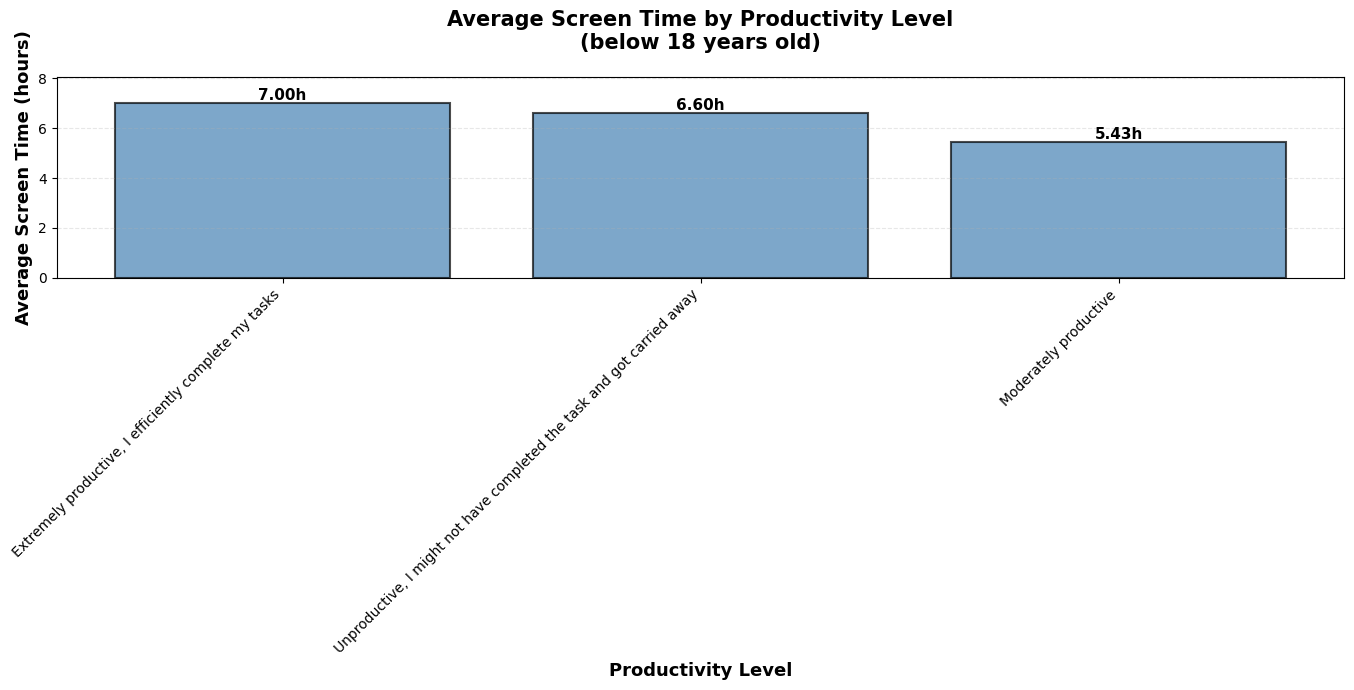


Promedio de Screen Time por nivel de Productividad:
Extremely productive, i efficiently complete my tasks: 7.00 horas
Unproductive, i might not have completed the task and got carried away: 6.60 horas
Moderately productive: 5.43 horas


In [ ]:
# Primero, veamos qué valores únicos tiene Average Screen Time
print("Valores únicos en Average Screen Time:")
print(d_menor['Average Screen Time'].unique())
print("\n")

# Limpiar la columna Average Screen Time
# Vamos a extraer solo los números y convertirlos
def limpiar_screen_time(valor):
    if pd.isna(valor):
        return np.nan

    # Convertir a string por si acaso
    valor_str = str(valor)

    # Si contiene "More than 10", retornar 11
    if "More than 10" in valor_str:
        return 11.0

    # Extraer el primer número que encontremos
    import re
    numeros = re.findall(r'\d+', valor_str)
    if numeros:
        # Si es un rango como "6-8", tomar el promedio
        if len(numeros) >= 2:
            return (float(numeros[0]) + float(numeros[1])) / 2
        else:
            return float(numeros[0])

    return np.nan

# Aplicar la limpieza
d_menor_limpio = d_menor.copy()
d_menor_limpio['Screen Time Numeric'] = d_menor_limpio['Average Screen Time'].apply(limpiar_screen_time)

# Verificar que funcionó
print("Primeras filas con Screen Time limpio:")
print(d_menor_limpio[['Average Screen Time', 'Screen Time Numeric']].head(10))
print("\n")

# Ahora sí, agrupar por Productivity y calcular el promedio
productivity_avg = d_menor_limpio.groupby('Productivity')['Screen Time Numeric'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(productivity_avg)), productivity_avg.values,
               color='steelblue', edgecolor='black', alpha=0.7, linewidth=1.5)

# Personalizar el gráfico
plt.xlabel('Productivity Level', fontsize=13, fontweight='bold')
plt.ylabel('Average Screen Time (hours)', fontsize=13, fontweight='bold')
plt.title('Average Screen Time by Productivity Level\n(below 18 years old)',
          fontsize=15, fontweight='bold', pad=20)

# Configurar las etiquetas del eje X
labels = [label.replace('i ', 'I ') for label in productivity_avg.index]  # Capitalizar
plt.xticks(range(len(productivity_avg)), labels, rotation=45, ha='right', fontsize=10)

# Añadir valores encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}h',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(productivity_avg.values) * 1.15)  # Dar espacio arriba
plt.show()

# Mostrar también los valores numéricos
print("\nPromedio de Screen Time por nivel de Productividad:")
print("="*70)
for prod, avg_time in productivity_avg.items():
    print(f"{prod}: {avg_time:.2f} horas")

## d_adulto

In [ ]:
d_adulto = data[data['Age Group'].str.contains("24|34|44", case=False, na=False)]
d_adulto.head()

,Unnamed: 0,Age Group,Gender,Education Level,Occupation,Average Screen Time,Device,Screen Activity,App Category,Screen Time Period,Environment,Productivity,Attention Span,Work Strategy,Notification Handling,Usage of Productivity Apps
0,0,18–24,Male,Undergraduate,Student,More than 10,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"Yes, but i did not find them of any help"
1,1,18–24,Male,Undergraduate,Professional,8-10,Smartphone,"Entertainment (gaming, streaming, social media...","Streaming (e.g., YouTube, Netflix)",Late night (10 PM–6 AM),Quite workplace,Moderately productive,More than 1 hour,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
3,3,25–34,Male,Undergraduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),Quite workplace,"Extremely productive, i efficiently complete m...",10–30 minutes,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
6,6,35–44,Male,Graduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Productivity (e.g., Microsoft Office, Notion)",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,Eliminate all distractions,Turn off notifications altogether,"No, i do not use them"
7,7,18–24,Female,Undergraduate,Student,6–8,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),Collaborative/team setting,"Unproductive, i might not have completed the t...",10–30 minutes,Eliminate all distractions,Check them briefly and resume my work,"No, i do not use them"


Valores únicos en Average Screen Time:
['More than 10' '8-10' '6–8' '4–6' '2–4']


Primeras filas con Screen Time limpio:
   Average Screen Time  Screen Time Numeric
0         More than 10                 11.0
1                 8-10                  9.0
3                 8-10                  9.0
6                 8-10                  9.0
7                  6–8                  7.0
11                8-10                  9.0
12                 4–6                  5.0
14                 4–6                  5.0
15        More than 10                 11.0
18                 2–4                  3.0




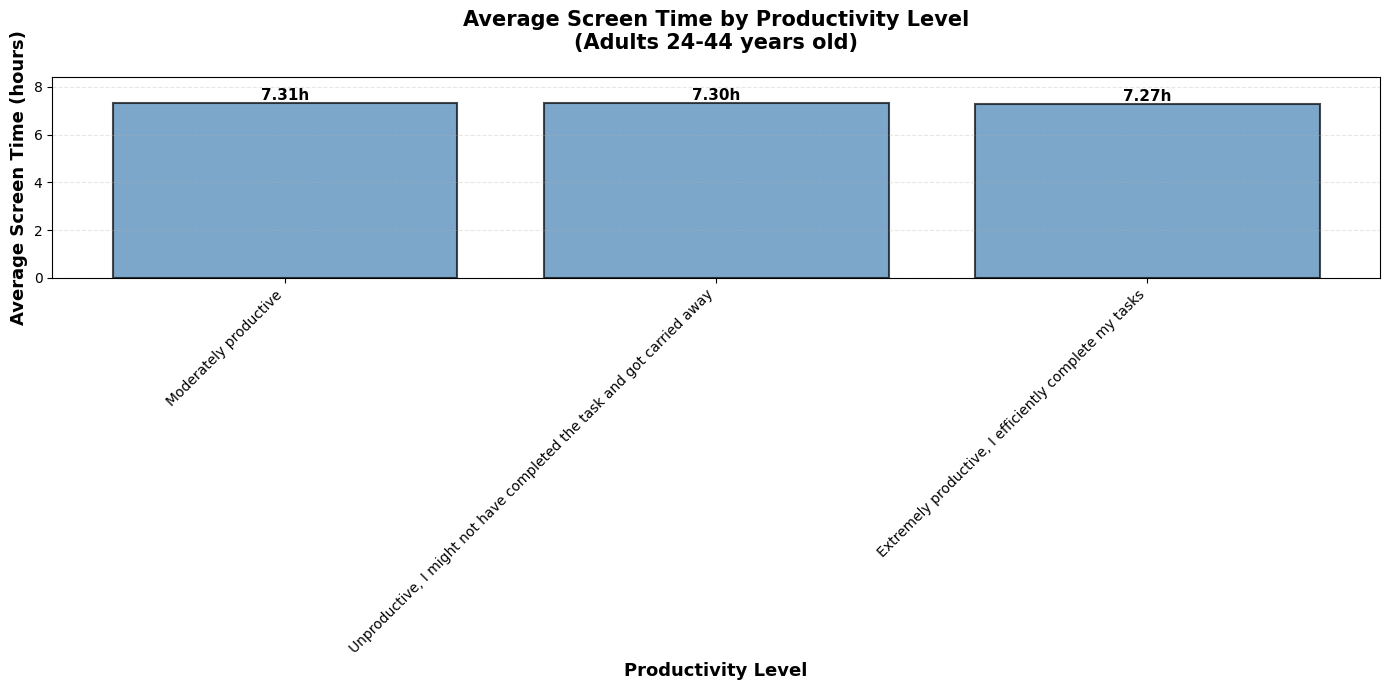


Promedio de Screen Time por nivel de Productividad:
Moderately productive: 7.31 horas
Unproductive, i might not have completed the task and got carried away: 7.30 horas
Extremely productive, i efficiently complete my tasks: 7.27 horas


In [ ]:
# Primero, veamos qué valores únicos tiene Average Screen Time
print("Valores únicos en Average Screen Time:")
print(d_adulto['Average Screen Time'].unique())
print("\n")

# Limpiar la columna Average Screen Time
# Vamos a extraer solo los números y convertirlos
def limpiar_screen_time(valor):
    if pd.isna(valor):
        return np.nan

    # Convertir a string por si acaso
    valor_str = str(valor)

    # Si contiene "More than 10", retornar 11
    if "More than 10" in valor_str:
        return 11.0

    # Extraer el primer número que encontremos
    import re
    numeros = re.findall(r'\d+', valor_str)
    if numeros:
        # Si es un rango como "6-8", tomar el promedio
        if len(numeros) >= 2:
            return (float(numeros[0]) + float(numeros[1])) / 2
        else:
            return float(numeros[0])

    return np.nan

# Aplicar la limpieza
d_adulto_limpio = d_adulto.copy()
d_adulto_limpio['Screen Time Numeric'] = d_adulto_limpio['Average Screen Time'].apply(limpiar_screen_time)

# Verificar que funcionó
print("Primeras filas con Screen Time limpio:")
print(d_adulto_limpio[['Average Screen Time', 'Screen Time Numeric']].head(10))
print("\n")

# Ahora sí, agrupar por Productivity y calcular el promedio
productivity_avg = d_adulto_limpio.groupby('Productivity')['Screen Time Numeric'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(productivity_avg)), productivity_avg.values,
               color='steelblue', edgecolor='black', alpha=0.7, linewidth=1.5)

# Personalizar el gráfico
plt.xlabel('Productivity Level', fontsize=13, fontweight='bold')
plt.ylabel('Average Screen Time (hours)', fontsize=13, fontweight='bold')
plt.title('Average Screen Time by Productivity Level\n(Adults 24-44 years old)',
          fontsize=15, fontweight='bold', pad=20)

# Configurar las etiquetas del eje X
labels = [label.replace('i ', 'I ') for label in productivity_avg.index]  # Capitalizar
plt.xticks(range(len(productivity_avg)), labels, rotation=45, ha='right', fontsize=10)

# Añadir valores encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}h',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(productivity_avg.values) * 1.15)  # Dar espacio arriba
plt.show()

# Mostrar también los valores numéricos
print("\nPromedio de Screen Time por nivel de Productividad:")
print("="*70)
for prod, avg_time in productivity_avg.items():
    print(f"{prod}: {avg_time:.2f} horas")

## d_mayor

In [ ]:
d_mayor = data[data['Age Group'].str.contains("45", case=False, na=False)]
d_mayor.head()

,Unnamed: 0,Age Group,Gender,Education Level,Occupation,Average Screen Time,Device,Screen Activity,App Category,Screen Time Period,Environment,Productivity,Attention Span,Work Strategy,Notification Handling,Usage of Productivity Apps
2,2,45 and above,Female,Graduate,Professional,4–6,Smartphone,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),I can work in any environment,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"No, i do not use them"
4,4,45 and above,Male,Graduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Productivity (e.g., Microsoft Office, Notion)",Afternoon (12 PM–6 PM),I can work in any environment,"Extremely productive, i efficiently complete m...",30–60 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"
28,28,45 and above,Male,Graduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Productivity (e.g., Microsoft Office, Notion)",Afternoon (12 PM–6 PM),Collaborative/team setting,Moderately productive,More than 1 hour,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"
50,50,45 and above,Female,Graduate,Professional,4–6,Smartphone,Academic/Work-related,"Messaging (e.g., WhatsApp, Messenger)",Morning (6 AM–12 PM),Quite workplace,Moderately productive,Less than 10 minutes,Take regular breaks,Spend time interacting with the notifications,"Yes, they are extremely helpful"
145,145,45 and above,Male,Graduate,Professional,8-10,Smartphone,Academic/Work-related,"Messaging (e.g., WhatsApp, Messenger)",Morning (6 AM–12 PM),I can work in any environment,"Extremely productive, i efficiently complete m...",Less than 10 minutes,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"


Valores únicos en Average Screen Time:
['4–6' '8-10']


Primeras filas con Screen Time limpio:
    Average Screen Time  Screen Time Numeric
2                   4–6                  5.0
4                  8-10                  9.0
28                 8-10                  9.0
50                  4–6                  5.0
145                8-10                  9.0
198                8-10                  9.0




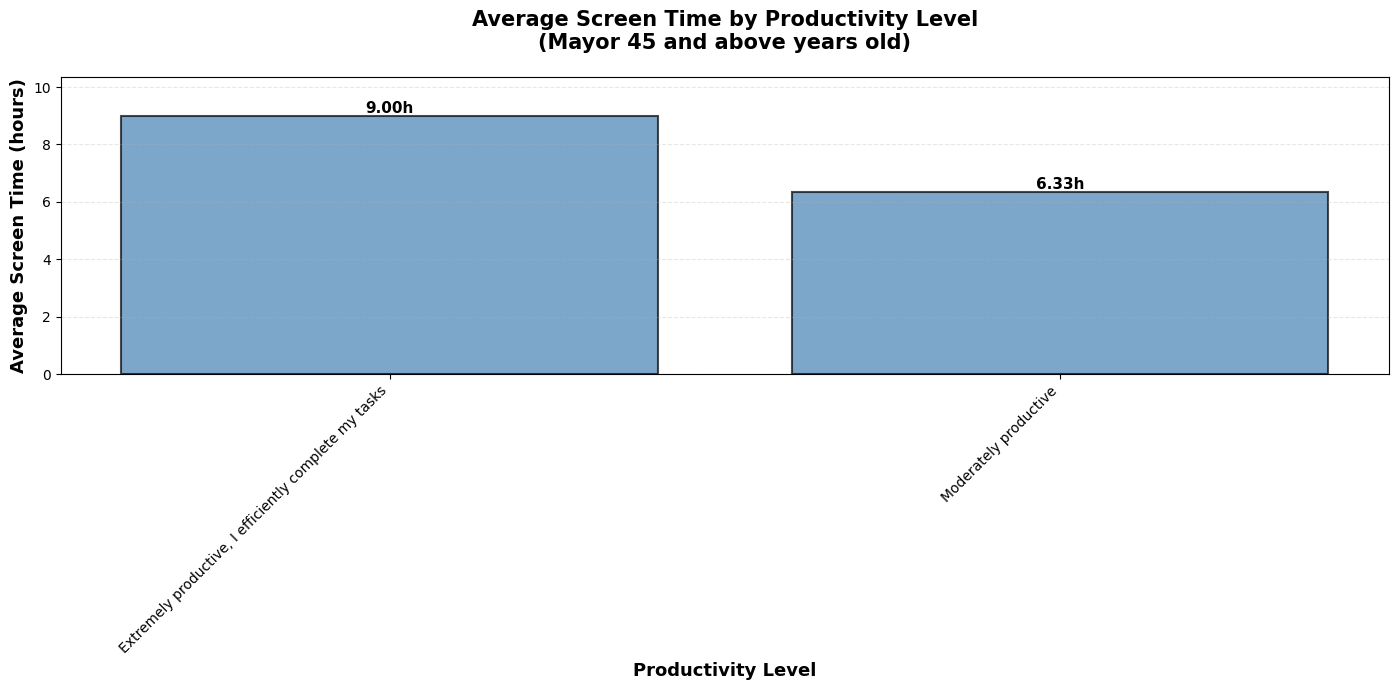


Promedio de Screen Time por nivel de Productividad:
Extremely productive, i efficiently complete my tasks: 9.00 horas
Moderately productive: 6.33 horas


In [ ]:
# Primero, veamos qué valores únicos tiene Average Screen Time
print("Valores únicos en Average Screen Time:")
print(d_mayor['Average Screen Time'].unique())
print("\n")

# Limpiar la columna Average Screen Time
# Vamos a extraer solo los números y convertirlos
def limpiar_screen_time(valor):
    if pd.isna(valor):
        return np.nan

    # Convertir a string por si acaso
    valor_str = str(valor)

    # Si contiene "More than 10", retornar 11
    if "More than 10" in valor_str:
        return 11.0

    # Extraer el primer número que encontremos
    import re
    numeros = re.findall(r'\d+', valor_str)
    if numeros:
        # Si es un rango como "6-8", tomar el promedio
        if len(numeros) >= 2:
            return (float(numeros[0]) + float(numeros[1])) / 2
        else:
            return float(numeros[0])

    return np.nan

# Aplicar la limpieza
d_mayor_limpio = d_mayor.copy()
d_mayor_limpio['Screen Time Numeric'] = d_mayor_limpio['Average Screen Time'].apply(limpiar_screen_time)

# Verificar que funcionó
print("Primeras filas con Screen Time limpio:")
print(d_mayor_limpio[['Average Screen Time', 'Screen Time Numeric']].head(10))
print("\n")

# Ahora sí, agrupar por Productivity y calcular el promedio
productivity_avg = d_mayor_limpio.groupby('Productivity')['Screen Time Numeric'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(productivity_avg)), productivity_avg.values,
               color='steelblue', edgecolor='black', alpha=0.7, linewidth=1.5)

# Personalizar el gráfico
plt.xlabel('Productivity Level', fontsize=13, fontweight='bold')
plt.ylabel('Average Screen Time (hours)', fontsize=13, fontweight='bold')
plt.title('Average Screen Time by Productivity Level\n(Mayor 45 and above years old)',
          fontsize=15, fontweight='bold', pad=20)

# Configurar las etiquetas del eje X
labels = [label.replace('i ', 'I ') for label in productivity_avg.index]  # Capitalizar
plt.xticks(range(len(productivity_avg)), labels, rotation=45, ha='right', fontsize=10)

# Añadir valores encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}h',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(productivity_avg.values) * 1.15)  # Dar espacio arriba
plt.show()

# Mostrar también los valores numéricos
print("\nPromedio de Screen Time por nivel de Productividad:")
print("="*70)
for prod, avg_time in productivity_avg.items():
    print(f"{prod}: {avg_time:.2f} horas")

# Filtrado de genero

In [ ]:
d_masculino = data[data['Gender'] == 'Male']
d_masculino.head()

,Unnamed: 0,Age Group,Gender,Education Level,Occupation,Average Screen Time,Device,Screen Activity,App Category,Screen Time Period,Environment,Productivity,Attention Span,Work Strategy,Notification Handling,Usage of Productivity Apps
0,0,18–24,Male,Undergraduate,Student,More than 10,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"Yes, but i did not find them of any help"
1,1,18–24,Male,Undergraduate,Professional,8-10,Smartphone,"Entertainment (gaming, streaming, social media...","Streaming (e.g., YouTube, Netflix)",Late night (10 PM–6 AM),Quite workplace,Moderately productive,More than 1 hour,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
3,3,25–34,Male,Undergraduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),Quite workplace,"Extremely productive, i efficiently complete m...",10–30 minutes,"None, i prefer to work without any strategies",Ignore them until my task is completed,"No, i do not use them"
4,4,45 and above,Male,Graduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Productivity (e.g., Microsoft Office, Notion)",Afternoon (12 PM–6 PM),I can work in any environment,"Extremely productive, i efficiently complete m...",30–60 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"
6,6,35–44,Male,Graduate,Professional,8-10,Laptop/PC,Academic/Work-related,"Productivity (e.g., Microsoft Office, Notion)",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,Eliminate all distractions,Turn off notifications altogether,"No, i do not use them"


Valores únicos en Average Screen Time:
['More than 10' '8-10' '6–8' '4–6' '2–4' 'Less than 2']


Primeras filas con Screen Time limpio:
   Average Screen Time  Screen Time Numeric
0         More than 10                 11.0
1                 8-10                  9.0
3                 8-10                  9.0
4                 8-10                  9.0
6                 8-10                  9.0
8         More than 10                 11.0
9                  6–8                  7.0
10                 6–8                  7.0
12                 4–6                  5.0
14                 4–6                  5.0




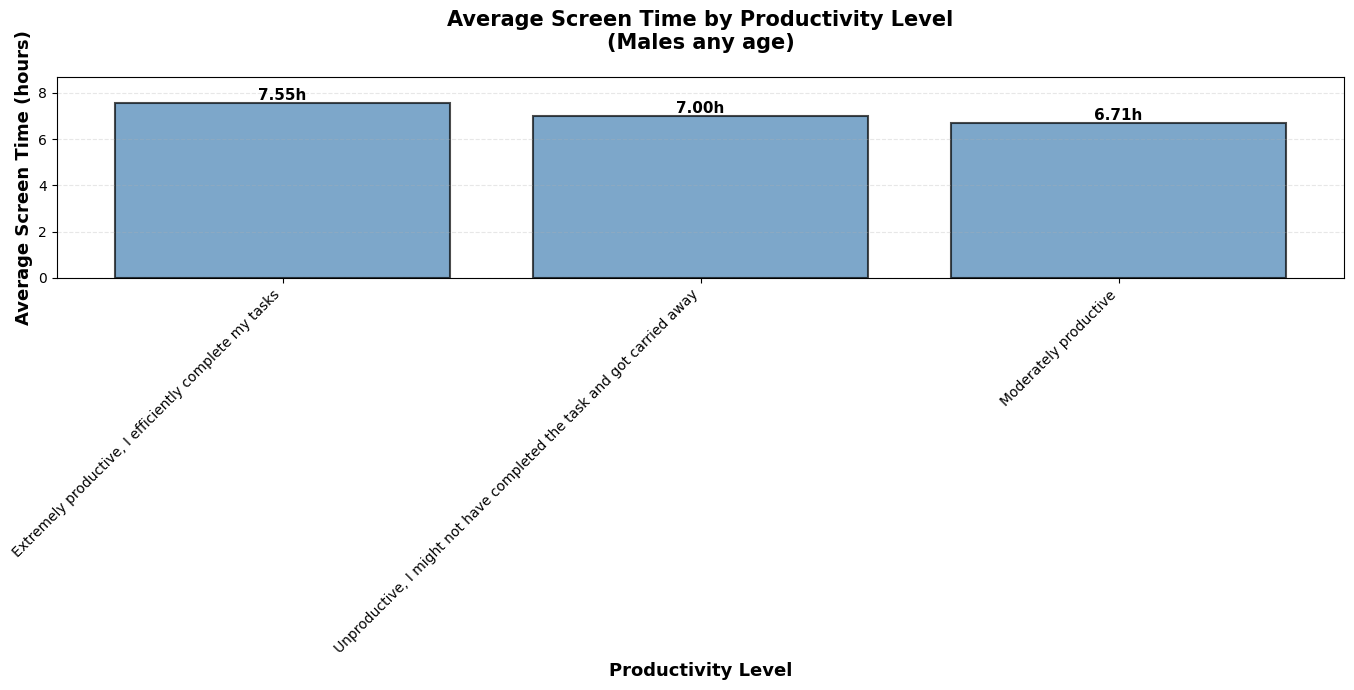


Promedio de Screen Time por nivel de Productividad:
Extremely productive, i efficiently complete my tasks: 7.55 horas
Unproductive, i might not have completed the task and got carried away: 7.00 horas
Moderately productive: 6.71 horas


In [ ]:
# Primero, veamos qué valores únicos tiene Average Screen Time
print("Valores únicos en Average Screen Time:")
print(d_masculino['Average Screen Time'].unique())
print("\n")

# Limpiar la columna Average Screen Time
# Vamos a extraer solo los números y convertirlos
def limpiar_screen_time(valor):
    if pd.isna(valor):
        return np.nan

    # Convertir a string por si acaso
    valor_str = str(valor)

    # Si contiene "More than 10", retornar 11
    if "More than 10" in valor_str:
        return 11.0

    # Extraer el primer número que encontremos
    import re
    numeros = re.findall(r'\d+', valor_str)
    if numeros:
        # Si es un rango como "6-8", tomar el promedio
        if len(numeros) >= 2:
            return (float(numeros[0]) + float(numeros[1])) / 2
        else:
            return float(numeros[0])

    return np.nan

# Aplicar la limpieza
d_masculino_limpio = d_masculino.copy()
d_masculino_limpio['Screen Time Numeric'] = d_masculino_limpio['Average Screen Time'].apply(limpiar_screen_time)

# Verificar que funcionó
print("Primeras filas con Screen Time limpio:")
print(d_masculino_limpio[['Average Screen Time', 'Screen Time Numeric']].head(10))
print("\n")

# Ahora sí, agrupar por Productivity y calcular el promedio
productivity_avg = d_masculino_limpio.groupby('Productivity')['Screen Time Numeric'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(productivity_avg)), productivity_avg.values,
               color='steelblue', edgecolor='black', alpha=0.7, linewidth=1.5)

# Personalizar el gráfico
plt.xlabel('Productivity Level', fontsize=13, fontweight='bold')
plt.ylabel('Average Screen Time (hours)', fontsize=13, fontweight='bold')
plt.title('Average Screen Time by Productivity Level\n(Males any age)',
          fontsize=15, fontweight='bold', pad=20)

# Configurar las etiquetas del eje X
labels = [label.replace('i ', 'I ') for label in productivity_avg.index]  # Capitalizar
plt.xticks(range(len(productivity_avg)), labels, rotation=45, ha='right', fontsize=10)

# Añadir valores encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}h',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(productivity_avg.values) * 1.15)  # Dar espacio arriba
plt.show()

# Mostrar también los valores numéricos
print("\nPromedio de Screen Time por nivel de Productividad:")
print("="*70)
for prod, avg_time in productivity_avg.items():
    print(f"{prod}: {avg_time:.2f} horas")

In [ ]:
d_femenino = data[data['Gender'] == 'Female']
d_femenino.head()

,Unnamed: 0,Age Group,Gender,Education Level,Occupation,Average Screen Time,Device,Screen Activity,App Category,Screen Time Period,Environment,Productivity,Attention Span,Work Strategy,Notification Handling,Usage of Productivity Apps
2,2,45 and above,Female,Graduate,Professional,4–6,Smartphone,Academic/Work-related,"Social Media (e.g., Facebook, Instagram, Linke...",Afternoon (12 PM–6 PM),I can work in any environment,Moderately productive,10–30 minutes,Take regular breaks,Check them briefly and resume my work,"No, i do not use them"
5,5,Below 18,Female,High school or below,Student,4–6,Smartphone,"Entertainment (gaming, streaming, social media...","Streaming (e.g., YouTube, Netflix)",Evening (6 PM–10 PM),Quite workplace,Moderately productive,10–30 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"
7,7,18–24,Female,Undergraduate,Student,6–8,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),Collaborative/team setting,"Unproductive, i might not have completed the t...",10–30 minutes,Eliminate all distractions,Check them briefly and resume my work,"No, i do not use them"
11,11,18–24,Female,Undergraduate,Student,8-10,Smartphone,"Entertainment (gaming, streaming, social media...","Streaming (e.g., YouTube, Netflix)",Afternoon (12 PM–6 PM),Quite workplace,"Unproductive, i might not have completed the t...",Less than 10 minutes,"None, i prefer to work without any strategies",Spend time interacting with the notifications,"No, i do not use them"
13,13,Below 18,Female,High school or below,Student,6–8,Smartphone,"Entertainment (gaming, streaming, social media...","Social Media (e.g., Facebook, Instagram, Linke...",Evening (6 PM–10 PM),I can work in any environment,"Unproductive, i might not have completed the t...",Less than 10 minutes,"None, i prefer to work without any strategies",Check them briefly and resume my work,"No, i do not use them"


Valores únicos en Average Screen Time:
['4–6' '6–8' '8-10' '2–4' 'More than 10']


Primeras filas con Screen Time limpio:
   Average Screen Time  Screen Time Numeric
2                  4–6                  5.0
5                  4–6                  5.0
7                  6–8                  7.0
11                8-10                  9.0
13                 6–8                  7.0
22                 2–4                  3.0
23                 6–8                  7.0
24                 6–8                  7.0
26                 6–8                  7.0
35                 6–8                  7.0




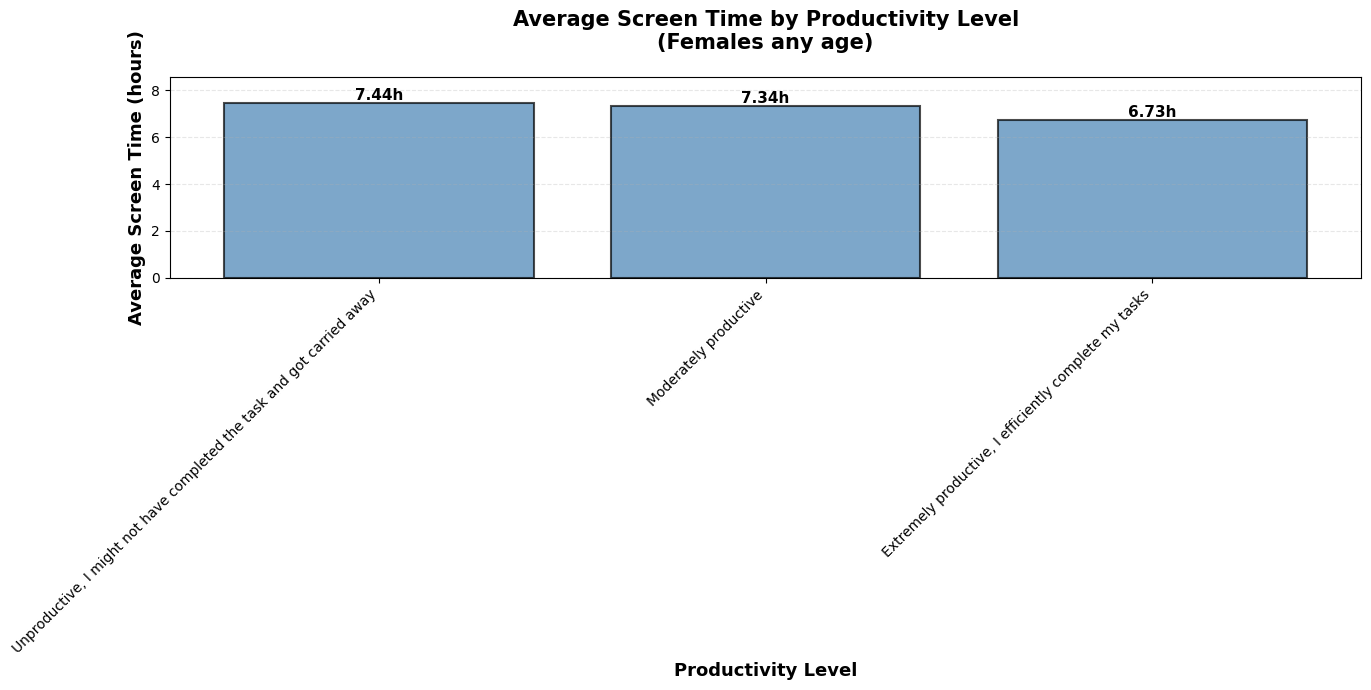


Promedio de Screen Time por nivel de Productividad:
Unproductive, i might not have completed the task and got carried away: 7.44 horas
Moderately productive: 7.34 horas
Extremely productive, i efficiently complete my tasks: 6.73 horas


In [ ]:
# Primero, veamos qué valores únicos tiene Average Screen Time
print("Valores únicos en Average Screen Time:")
print(d_femenino['Average Screen Time'].unique())
print("\n")

# Limpiar la columna Average Screen Time
# Vamos a extraer solo los números y convertirlos
def limpiar_screen_time(valor):
    if pd.isna(valor):
        return np.nan

    # Convertir a string por si acaso
    valor_str = str(valor)

    # Si contiene "More than 10", retornar 11
    if "More than 10" in valor_str:
        return 11.0

    # Extraer el primer número que encontremos
    import re
    numeros = re.findall(r'\d+', valor_str)
    if numeros:
        # Si es un rango como "6-8", tomar el promedio
        if len(numeros) >= 2:
            return (float(numeros[0]) + float(numeros[1])) / 2
        else:
            return float(numeros[0])

    return np.nan

# Aplicar la limpieza
d_femenino_limpio = d_femenino.copy()
d_femenino_limpio['Screen Time Numeric'] = d_femenino_limpio['Average Screen Time'].apply(limpiar_screen_time)

# Verificar que funcionó
print("Primeras filas con Screen Time limpio:")
print(d_femenino_limpio[['Average Screen Time', 'Screen Time Numeric']].head(10))
print("\n")

# Ahora sí, agrupar por Productivity y calcular el promedio
productivity_avg = d_femenino_limpio.groupby('Productivity')['Screen Time Numeric'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(productivity_avg)), productivity_avg.values,
               color='steelblue', edgecolor='black', alpha=0.7, linewidth=1.5)

# Personalizar el gráfico
plt.xlabel('Productivity Level', fontsize=13, fontweight='bold')
plt.ylabel('Average Screen Time (hours)', fontsize=13, fontweight='bold')
plt.title('Average Screen Time by Productivity Level\n(Females any age)',
          fontsize=15, fontweight='bold', pad=20)

# Configurar las etiquetas del eje X
labels = [label.replace('i ', 'I ') for label in productivity_avg.index]  # Capitalizar
plt.xticks(range(len(productivity_avg)), labels, rotation=45, ha='right', fontsize=10)

# Añadir valores encima de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}h',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(productivity_avg.values) * 1.15)  # Dar espacio arriba
plt.show()

# Mostrar también los valores numéricos
print("\nPromedio de Screen Time por nivel de Productividad:")
print("="*70)
for prod, avg_time in productivity_avg.items():
    print(f"{prod}: {avg_time:.2f} horas")

# Representación por actividad

In [ ]:
# FUNCIÓN GENERAL PARA LIMPIAR 'Average Screen Time'

def limpiar_screen_time(valor):
    """Convierte los valores de tiempo de pantalla en números (horas)."""
    if pd.isna(valor):
        return np.nan
    valor_str = str(valor)
    if "More than 10" in valor_str:
        return 11.0
    numeros = re.findall(r'\d+', valor_str)
    if numeros:
        if len(numeros) >= 2:
            return (float(numeros[0]) + float(numeros[1])) / 2
        else:
            return float(numeros[0])
    return np.nan



# FUNCIÓN GENERAL PARA ANALIZAR UN GRUPO DE DATOS

def analizar_grupo(df, nombre_grupo):
    """Genera un gráfico de barras mostrando el promedio de tiempo de pantalla
       según el uso de apps de productividad."""
    # Limpiar y preparar datos
    df = df.copy()
    df['Screen Time Numeric'] = df['Average Screen Time'].apply(limpiar_screen_time)

    # Agrupar y calcular promedio
    promedio = df.groupby('Screen Activity')['Screen Time Numeric'].mean().sort_values(ascending=False)

    # GRAFICAR RESULTADOS

    plt.figure(figsize=(12, 6))
    sns.barplot(x=promedio.index, y=promedio.values, palette="crest", edgecolor="black")

    # Personalización visual
    plt.title(f'Tiempo promedio en pantalla dependiendo la actividad\n({nombre_grupo})',
              fontsize=16, fontweight='bold', pad=15)
    plt.xlabel('Actividad en Pantalla', fontsize=13, fontweight='bold')
    plt.ylabel('Tiempo Promedio en Pantalla (horas)', fontsize=13, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Añadir etiquetas encima de cada barra
    for i, v in enumerate(promedio.values):
        plt.text(i, v + 0.1, f'{v:.2f}h', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    # Mostrar valores en consola
    print(f"\nPromedio de Screen Time por uso de apps de productividad ({nombre_grupo}):")
    print("=" * 70)
    for app, avg_time in promedio.items():
        print(f"{app}: {avg_time:.2f} horas")


# FILTRAR Y ANALIZAR LOS DIFERENTES GRUPOS


# Grupo 1: Menores de 18
d_menor = data[data['Age Group'].str.contains("Below", case=False, na=False)]
analizar_grupo(d_menor, "Menores de 18 años")

# Grupo 2: Adultos jóvenes (24–44)
d_adulto = data[data['Age Group'].str.contains("24|34|44", case=False, na=False)]
analizar_grupo(d_adulto, "Adultos (24–44 años)")

# Grupo 3: Mayores de 45
d_mayor = data[data['Age Group'].str.contains("45", case=False, na=False)]
analizar_grupo(d_mayor, "Mayores de 45 años")


# Análisis por género

for gender in ["Male", "Female"]:
    d_genero = data[data['Gender'].str.contains(gender, case=False, na=False)]
    analizar_grupo(d_genero, f"{gender}")